In [20]:
from __future__ import print_function, division
import glob
from pykdf.kdf import load_kdf
import pandas as pd
import numpy as np
from scipy.signal import welch
from scipy.stats import spearmanr
from bw.util import fit_gaussian
import matplotlib.pyplot as plt
%matplotlib inline

# Abstract

TODO

# Introduction.

History of spectral analysis. Power useful.

Recent work in systems, cognitive, neuoscience and computational neuroscience suggest power in an oscillatory band is an insuffucient characterization.  Variations in peak width carry relevant information about both the biological and cognitive state of the system. However while these preliminary results suggest peak width may be an important variable, there are variety of potential mechanisms by which peak width can change, and no way to identify which mechanism(s) are present in the a given dataset. In this computational study we compare five alternative senarios by which peak width could vary, identifying situations in which one may be clearly and qualitativly identified from the rest.


Coupled - slow, fast

Mixed f, fixed drive
Drive ramp, single f
N Burst
Var of slide



# Methods

In [2]:
# %run make ie kur

# Results

TODO intro text.

12  peaks found.
corr(Drive, widths) SpearmanrResult(correlation=-0.37762237762237766, pvalue=0.22620604493502663)
corr(Drive, centers) SpearmanrResult(correlation=1.0, pvalue=0.0)
corr(widths, powers) SpearmanrResult(correlation=-0.52447552447552459, pvalue=0.080019375920274749)
corr(widths, centers) SpearmanrResult(correlation=-0.37762237762237766, pvalue=0.22620604493502663)


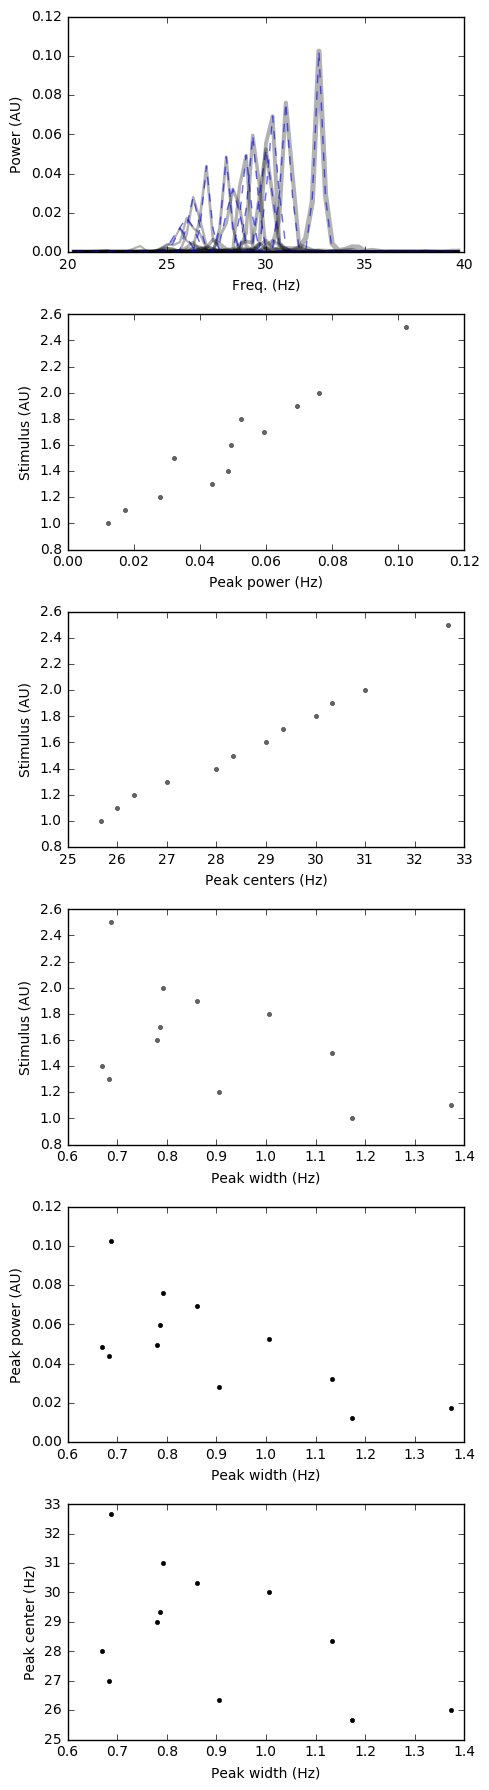

In [87]:
files = glob.glob("../data/drivie1/*.hdf5")

# -
ps = []
fits = []
psds = []
powers = []
widths = []
centers = []
for fi in files:
    res = load_kdf(fi)
    
    t = res['t']
    dt = res['dt']
    times = np.linspace(0, t, t * int(1 / float(dt)))
    
    lfp = res['lfp']
    
    # -
    # Get PSD and peak properties.
    fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)
    m = np.logical_and(fs < 40, fs > 20)
    fs = fs[m]

    psd = psd[m]
    center, power, width, fit = fit_gaussian(fs, psd, 20, mph=1e-2)

    # - 
    fits.append(fit)
    psds.append(psd)
    
    powers.append(power)
    widths.append(2.355 * width)
    centers.append(center)
    ps.append([res['P']] * len(center))
    
ps = np.concatenate(ps)
centers = np.concatenate(centers)
powers = np.concatenate(powers)
widths = np.concatenate(widths)

# -
plt.figure(figsize=(5, 18))
n_plot = 6
n = 1
plt.subplot(n_plot, 1, n)
for p, psd, fit in zip(ps, psds, fits):
    plt.plot(fs, psd, linewidth=1.5 * p, color='k', alpha=.3)
    plt.plot(fs, fit, linestyle='--', color='blue', alpha=.6)
    plt.legend(loc='bottom', ncol=10)
    plt.xlabel("Freq. (Hz)")
    plt.ylabel("Power (AU)")
    plt.tight_layout()


n += 1
plt.subplot(n_plot, 1, n)
# plt.plot(ps, centers, '.k')
plt.plot(powers, ps, '.k', alpha=0.6)
plt.ylabel("Stimulus (AU)")
plt.xlabel("Peak power (Hz)")
# plt.ylim(0, .3)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
# plt.plot(ps, centers, '.k')
plt.plot(centers, ps, '.k', alpha=0.6)
plt.ylabel("Stimulus (AU)")
plt.xlabel("Peak centers (Hz)")
# plt.ylim(0, .3)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
# plt.plot(ps, centers, '.k')
plt.plot(widths, ps, '.k', alpha=0.6)
plt.ylabel("Stimulus (AU)")
plt.xlabel("Peak width (Hz)")
# plt.ylim(0, .3)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, powers, '.k')
plt.xlabel("Peak width (Hz)")
plt.ylabel("Peak power (AU)")
# plt.ylim(0, 1)
# plt.xlim(0, .3)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, centers, '.k')
plt.ylabel("Peak center (Hz)")
plt.xlabel("Peak width (Hz)")
plt.tight_layout()
# plt.ylim(20, 40)
# plt.xlim(0, .3)

plt.savefig("../figs/drivie1.pdf")

print(len(fits), " peaks found.")
print("corr(Drive, widths)", spearmanr(ps, widths))
print("corr(Drive, centers)", spearmanr(ps, centers))
print("corr(widths, powers)", spearmanr(widths, powers))
print("corr(widths, centers)", spearmanr(widths, centers))

**Figure X.** The relationship between peak width, power, and stimulation strength for a single fast oscillating population. As the stimulus strength increases both the frequency of oscillation and and peak power increase, in a roughly linear manner. Peak width is however uneffect.
a. Power spectrum of the simulated LFP. Darker lines represent stronger stimuluation.
b. Center frequency as a function of stimulation strength.
c. Peak power as a function of oscillatory frequency.
d. Peak width as a funciton of oscillatory frequency.

995  peaks found.
corr(N pop, centers) SpearmanrResult(correlation=0.28686985903274653, pvalue=6.2785764255606706e-05)
corr(N pop, widths) SpearmanrResult(correlation=-0.04707730725199067, pvalue=0.52004942492698225)
corr(widths, powers) SpearmanrResult(correlation=-0.19634725110648965, pvalue=0.0067724540191388596)
corr(widths, centers) SpearmanrResult(correlation=-0.11325402052069136, pvalue=0.12074530438830265)


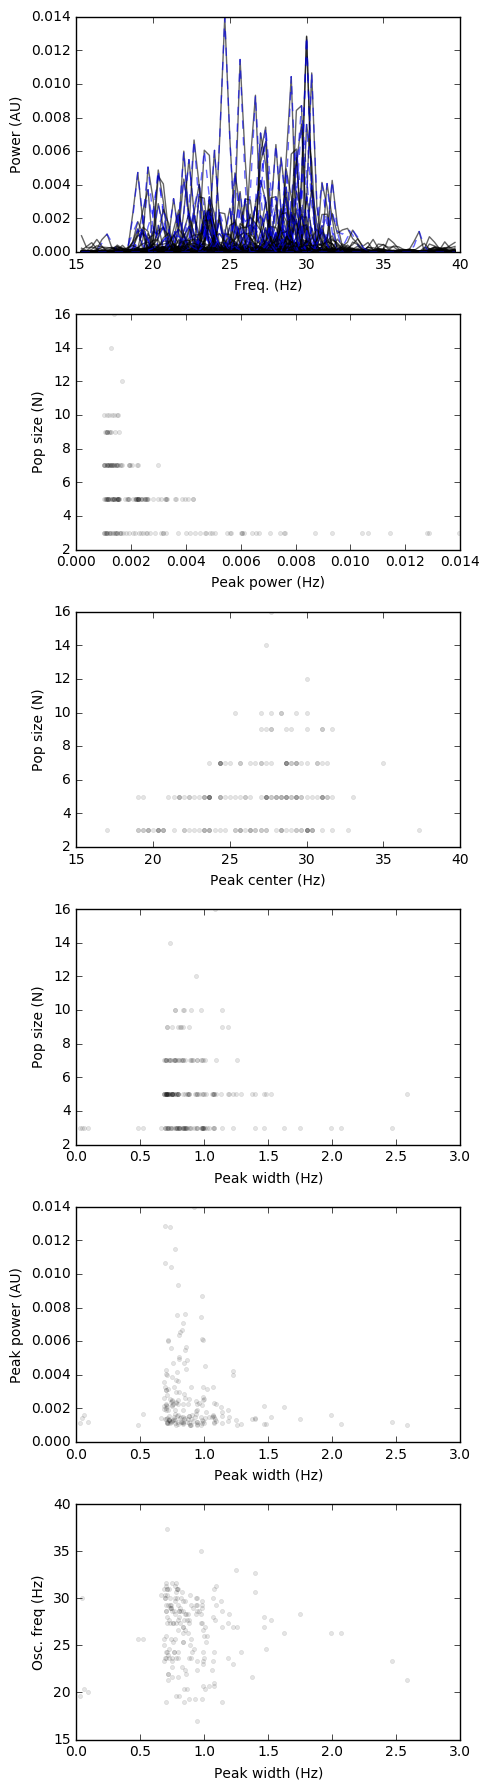

In [88]:
path = "/home/ejp/src/bw/data/mixie_n/"
n_sim = [3, 5, 7, 9, 10, 12, 14, 16, 18, 20]

ns = []
psds = []
powers = []
widths = []
centers = []
fits = []
for n in n_sim:
    files = glob.glob(path + 'n{}_run*.hdf5'.format(n))
    for fi in files:
        
        res = None
        res = load_kdf(fi)
        n = res['N']
        
        lfp = res['lfp']
        dt = res['dt']
        fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)
        
        m = np.logical_and(fs < 40, fs > 15)
        fs = fs[m]
        psd = psd[m]
    
        center, power, width, fit = fit_gaussian(fs, psd, 20, mph=1e-3)
        
        psds.append(psd)
        fits.append(fit)
        
        powers.append(power)
        widths.append(2.355 * width)
        centers.append(center)
        ns.append([n] * center.size)
        
ns = np.concatenate(ns)
centers = np.concatenate(centers)
powers = np.concatenate(powers)
widths = np.concatenate(widths)

# -
plt.figure(figsize=(5, 18))
n_plot = 6
n = 1
plt.subplot(n_plot, 1, n)
for p, psd, fit in zip(ns, psds, fits):
    plt.plot(fs, psd, color='k', alpha=.6)
    plt.plot(fs, fit, linestyle='--', color='blue', alpha=.6)
    plt.legend(loc='bottom', ncol=10)
    plt.xlabel("Freq. (Hz)")
    plt.ylabel("Power (AU)")
    plt.tight_layout()
#     plt.ylim(1e-4, 1)

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(powers, ns, '.k', alpha=0.1)
plt.xlabel("Peak power (Hz)")
plt.ylabel("Pop size (N)")
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(centers, ns, '.k', alpha=0.1)
plt.xlabel("Peak center (Hz)")
plt.ylabel("Pop size (N)")
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, ns, '.k', alpha=0.1)
plt.xlabel("Peak width (Hz)")
plt.ylabel("Pop size (N)")
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, powers, '.k', alpha=0.1)
plt.xlabel("Peak width (Hz)")
plt.ylabel("Peak power (AU)")
# plt.semilogy()
# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, centers, '.k', alpha=0.1)
plt.ylabel("Osc. freq (Hz)")
plt.xlabel("Peak width (Hz)")
plt.tight_layout()
# plt.ylim(20, 40)
# plt.xlim(0, .5)

plt.savefig("../figs/mixie_n.pdf")

# -
print(len(fits), " peaks found.")
print("corr(N pop, centers)", spearmanr(ns, centers))
print("corr(N pop, widths)", spearmanr(ns, widths))
print("corr(widths, powers)", spearmanr(widths, powers))
print("corr(widths, centers)", spearmanr(widths, centers))

**Figure X.** Oscillatory properties as a function of number of independent oscillators.

898  peaks found.
corr(Drive SD, centers) SpearmanrResult(correlation=0.20210098059979037, pvalue=1.6516340247844281e-24)
corr(Drive SD, widths) SpearmanrResult(correlation=-0.070328105223294732, pvalue=0.00042632303220609618)
corr(widths, powers) SpearmanrResult(correlation=-0.18545294121640077, pvalue=7.9402348081454993e-21)
corr(widths, centers) SpearmanrResult(correlation=-0.070153355289171632, pvalue=0.00044066103370470663)


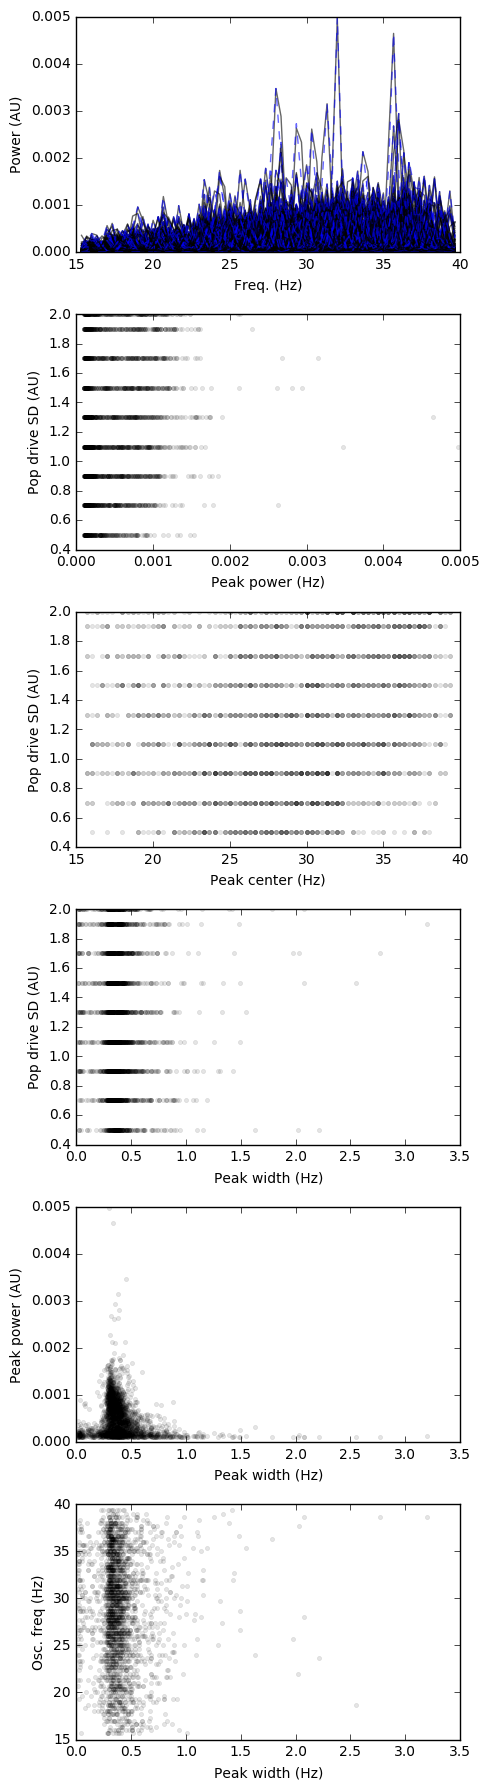

In [89]:
path = "/home/ejp/src/bw/data/mixie_s/"
n_sim = ['0.5', '0.7', '0.9', '1.1', '1.3', '1.5', '1.7', '1.9', '2.0']

ns = []
psds = []
powers = []
widths = []
centers = []
fits = []
for n in n_sim:
    files = glob.glob(path + 's{}_run*.hdf5'.format(n))
    for fi in files:
        
        res = None
        res = load_kdf(fi)
        
        lfp = res['lfp']
        dt = res['dt']
        fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)
        
        m = np.logical_and(fs < 40, fs > 15)
        fs = fs[m]
        psd = psd[m]
    
        center, power, width, fit = fit_gaussian(fs, psd, 20, mph=1e-4)
        
        psds.append(psd)
        fits.append(fit)
        
        powers.append(power)
        widths.append(width)
        centers.append(center)
        ns.append([float(n)] * center.size)
        
ns = np.concatenate(ns)
centers = np.concatenate(centers)
powers = np.concatenate(powers)
widths = np.concatenate(widths)

# -
plt.figure(figsize=(5, 18))
n_plot = 6
n = 1
plt.subplot(n_plot, 1, n)
for p, psd, fit in zip(ns, psds, fits):
    plt.plot(fs, psd, color='k', alpha=.6)
    plt.plot(fs, fit, linestyle='--', color='blue', alpha=.6)
    plt.legend(loc='bottom', ncol=10)
    plt.xlabel("Freq. (Hz)")
    plt.ylabel("Power (AU)")
    plt.tight_layout()
#     plt.ylim(1e-4, 1)

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(powers, ns, '.k', alpha=0.1)
plt.ylabel("Pop drive SD (AU)")
plt.xlabel("Peak power (Hz)")
# plt.ylim(0, 2)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(centers, ns, '.k', alpha=0.1)
plt.ylabel("Pop drive SD (AU)")
plt.xlabel("Peak center (Hz)")
# plt.ylim(0, 2)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, ns, '.k', alpha=0.1)
plt.ylabel("Pop drive SD (AU)")
plt.xlabel("Peak width (Hz)")
# plt.ylim(0, 2)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, powers, '.k', alpha=0.1)
plt.xlabel("Peak width (Hz)")
plt.ylabel("Peak power (AU)")
# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, centers, '.k', alpha=0.1)
plt.ylabel("Osc. freq (Hz)")
plt.xlabel("Peak width (Hz)")
plt.tight_layout()
# plt.ylim(20, 40)
# plt.xlim(0, 2)

plt.savefig("../figs/mixie_s.pdf")

# -
print(len(fits), " peaks found.")
print("corr(Drive SD, centers)", spearmanr(ns, centers))
print("corr(Drive SD, widths)", spearmanr(ns, widths))
print("corr(widths, powers)", spearmanr(widths, powers))
print("corr(widths, centers)", spearmanr(widths, centers))

## Burstie

96  peaks found.
corr(burst L, centers) SpearmanrResult(correlation=-0.19236776998600244, pvalue=0.20551591637354041)
corr(burst L, widths) SpearmanrResult(correlation=-0.87539115301615078, pvalue=3.6589600840049977e-15)
corr(widths, powers) SpearmanrResult(correlation=-0.86455862977602116, pvalue=1.9620988559783188e-14)
corr(widths, centers) SpearmanrResult(correlation=0.31601986929774628, pvalue=0.034446861281553491)


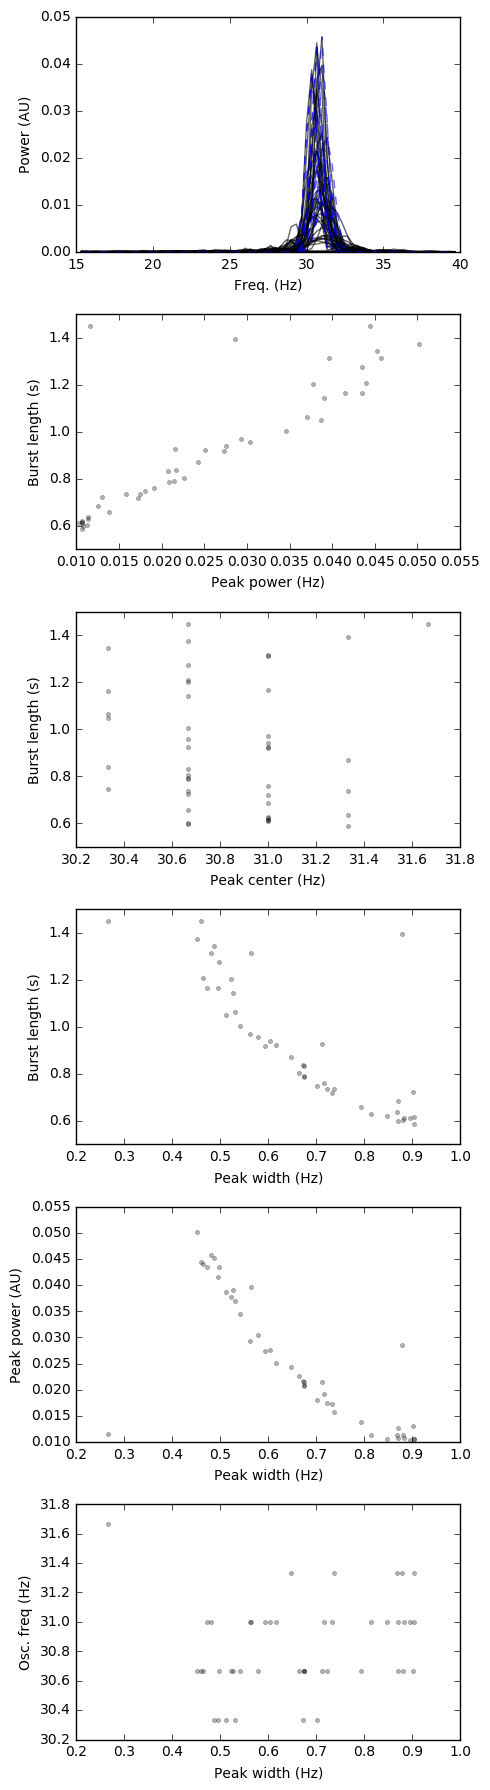

In [90]:
path = "/home/ejp/src/bw/data/burstie1/"
n_sim = [0, ]

ns = []
psds = []
powers = []
widths = []
centers = []
fits = []
for n in n_sim:
    files = glob.glob(path + '*.hdf5'.format(n))
    for fi in files:
        
        res = None
        res = load_kdf(fi)
        
        w = res['w']

        lfp = res['lfp']
        dt = res['dt']
        fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)
        
        m = np.logical_and(fs < 40, fs > 15)
        fs = fs[m]
        psd = psd[m]
    
        center, power, width, fit = fit_gaussian(fs, psd, 20, mph=1e-2)
        
        psds.append(psd)
        fits.append(fit)
        
        powers.append(power)
        widths.append(width)
        centers.append(center)
        
        ns.append([w] * center.size)
        
ns = np.concatenate(ns)
centers = np.concatenate(centers)
powers = np.concatenate(powers)
widths = np.concatenate(widths)

# ----------------------------------------------------------------------
plt.figure(figsize=(5, 18))
n_plot = 6
n = 1
plt.subplot(n_plot, 1, n)
for p, psd, fit in zip(ns, psds, fits):
    plt.plot(fs, psd, color='k', alpha=.6)
    plt.plot(fs, fit, linestyle='--', color='blue', alpha=.6)
    plt.legend(loc='bottom', ncol=10)
    plt.xlabel("Freq. (Hz)")
    plt.ylabel("Power (AU)")
    plt.tight_layout()
#     plt.ylim(1e-4, 1)

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(powers, ns, '.k', alpha=0.3)
plt.ylabel("Burst length (s)")
plt.xlabel("Peak power (Hz)")
# plt.ylim(0, 2)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(centers, ns, '.k', alpha=0.3)
plt.ylabel("Burst length (s)")
plt.xlabel("Peak center (Hz)")
# plt.ylim(0, 2)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, ns, '.k', alpha=0.3)
plt.ylabel("Burst length (s)")
plt.xlabel("Peak width (Hz)")
# plt.ylim(0, 2)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, powers, '.k', alpha=0.3)
plt.xlabel("Peak width (Hz)")
plt.ylabel("Peak power (AU)")
# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, centers, '.k', alpha=0.3)
plt.ylabel("Osc. freq (Hz)")
plt.xlabel("Peak width (Hz)")
plt.tight_layout()
# plt.ylim(20, 40)
# plt.xlim(0, 2)

plt.savefig("../figs/burstie1.pdf")

# -
print(len(fits), " peaks found.")
print("corr(burst L, centers)", spearmanr(ns, centers))
print("corr(burst L, widths)", spearmanr(ns, widths))
print("corr(widths, powers)", spearmanr(widths, powers))
print("corr(widths, centers)", spearmanr(widths, centers))

# Driftie

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:74: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:75: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:85: FutureWarning: elementwise comparison failed; returning scalar

685  peaks found.
corr(drift, centers) SpearmanrResult(correlation=0.024603654738890254, pvalue=0.13697003999882701)
corr(drift, widths) SpearmanrResult(correlation=0.052496808055095177, pvalue=0.0014989746565250352)
corr(widths, powers) SpearmanrResult(correlation=-0.038501970463502441, pvalue=0.019924588410548543)
corr(widths, centers) SpearmanrResult(correlation=-0.043041166078304487, pvalue=0.0092563471632498406)


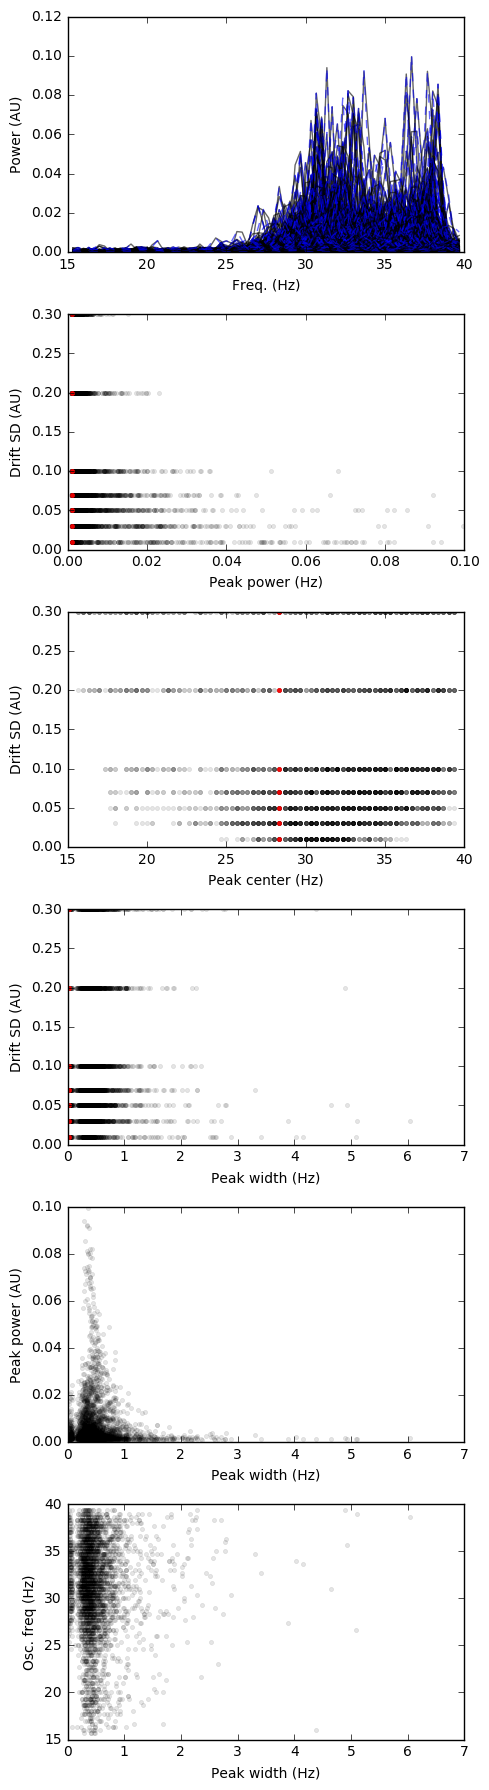

In [92]:
import sys
path = "/home/ejp/src/bw/data/driftie_d/"
n_sim = ['0.01', '0.03', '0.05', '0.07', '.1', '.2', '.3']

ns = []
psds = []
powers = []
widths = []
centers = []
fits = []
for n in n_sim:
    files = glob.glob(path + 'd{}_run*.hdf5'.format(n))
    for fi in files:
        
        res = None
        res = load_kdf(fi)
        
        lfp = res['lfp']
        dt = res['dt']
        fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)
        
        m = np.logical_and(fs < 40, fs > 15)
        fs = fs[m]
        psd = psd[m]
    
        try:
            center, power, width, fit = fit_gaussian(fs, psd, 20, mph=1e-3)
        except:
            print("Lin alg error on {}".format(sys.exc_info()[0]))
            continue
        
        psds.append(psd)
        fits.append(fit)
        
        powers.append(power)
        widths.append(width)
        centers.append(center)
        ns.append([float(n)] * center.size)
        
ns = np.concatenate(ns)
centers = np.concatenate(centers)
powers = np.concatenate(powers)
widths = np.concatenate(widths)

# -------------------------------------------------------------------------
plt.figure(figsize=(5, 18))
n_plot = 6
n = 1
plt.subplot(n_plot, 1, n)
for p, psd, fit in zip(ns, psds, fits):
    plt.plot(fs, psd, color='k', alpha=.6)
    plt.plot(fs, fit, linestyle='--', color='blue', alpha=.6)
    plt.legend(loc='bottom', ncol=10)
    plt.xlabel("Freq. (Hz)")
    plt.ylabel("Power (AU)")
    plt.tight_layout()
#     plt.ylim(1e-4, 1)

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(powers, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(powers[m]), n0, '.r', alpha=0.9, lw=10)
plt.ylabel("Drift SD (AU)")
plt.xlabel("Peak power (Hz)")
# plt.ylim(0, 5)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(centers, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(centers[m]), n0, '.r', alpha=0.9, lw=10)
plt.ylabel("Drift SD (AU)")
plt.xlabel("Peak center (Hz)")
# plt.ylim(0, 5)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(widths[m]), n0, '.r', alpha=0.9, lw=10)
plt.ylabel("Drift SD (AU)")
plt.xlabel("Peak width (Hz)")
# plt.ylim(0, 5)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, powers, '.k', alpha=0.1)
plt.xlabel("Peak width (Hz)")
plt.ylabel("Peak power (AU)")
# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, centers, '.k', alpha=0.1)
plt.ylabel("Osc. freq (Hz)")
plt.xlabel("Peak width (Hz)")
plt.tight_layout()
# plt.ylim(20, 40)
# plt.xlim(0, 2)

plt.savefig("../figs/driftie_d.pdf")

# -
print(len(fits), " peaks found.")
print("corr(drift, centers)", spearmanr(ns, centers))
print("corr(drift, widths)", spearmanr(ns, widths))
print("corr(widths, powers)", spearmanr(widths, powers))
print("corr(widths, centers)", spearmanr(widths, centers))

# Kuramoto

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:74: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:75: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:85: FutureWarning: elementwise comparison failed; returning scalar

500  peaks found.
corr(K, centers) SpearmanrResult(correlation=-0.028064947407331484, pvalue=0.34569323706612787)
corr(K, widths) SpearmanrResult(correlation=0.061717307583728079, pvalue=0.037962662414294489)
corr(widths, powers) SpearmanrResult(correlation=-0.087746343484861544, pvalue=0.0031432024510409029)
corr(widths, centers) SpearmanrResult(correlation=-0.080354688760998341, pvalue=0.0068563796347877121)


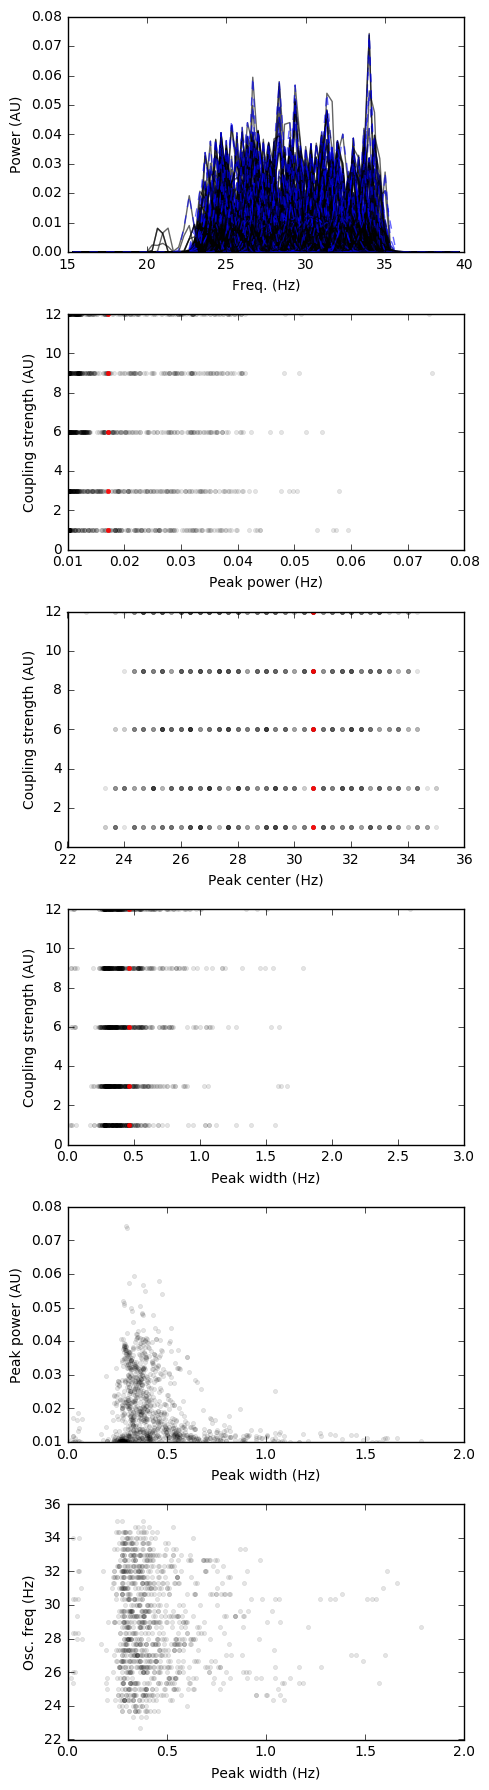

In [93]:
import sys
path = "/home/ejp/src/bw/data/kur_k/"
n_sim = ['1', '3', '6', '9', '12']

# ----------------------------------------------------------------------
ns = []
psds = []
powers = []
widths = []
centers = []
fits = []
for n in n_sim:
    files = glob.glob(path + 'k{}_run*.hdf5'.format(n))
    for fi in files:
        res = None
        res = load_kdf(fi)
        
        lfp = res['lfp']
        dt = res['dt']
        fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)
        
        m = np.logical_and(fs < 40, fs > 15)
        fs = fs[m]
        psd = psd[m]
    
        try:
            center, power, width, fit = fit_gaussian(fs, psd, 20, mph=1e-2)
        except:
            print("Lin alg error on {}".format(sys.exc_info()[0]))
            continue
        
        psds.append(psd)
        fits.append(fit)
        
        powers.append(power)
        widths.append(width)
        centers.append(center)
        ns.append([float(n)] * center.size)
        
ns = np.concatenate(ns)
centers = np.concatenate(centers)
powers = np.concatenate(powers)
widths = np.concatenate(widths)

# ----------------------------------------------------------------------
plt.figure(figsize=(5, 18))
n_plot = 6
n = 1
plt.subplot(n_plot, 1, n)
for p, psd, fit in zip(ns, psds, fits):
    plt.plot(fs, psd, color='k', alpha=.6)
    plt.plot(fs, fit, linestyle='--', color='blue', alpha=.6)
    plt.legend(loc='bottom', ncol=10)
    plt.xlabel("Freq. (Hz)")
    plt.ylabel("Power (AU)")
    plt.tight_layout()
#     plt.ylim(1e-4, 1)

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(powers, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(powers[m]), n0, '.r', alpha=0.9, lw=10)
plt.ylabel("Coupling strength (AU)")
plt.xlabel("Peak power (Hz)")
# plt.ylim(0, 5)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(centers, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(centers[m]), n0, '.r', alpha=0.9, lw=10)
plt.ylabel("Coupling strength (AU)")
plt.xlabel("Peak center (Hz)")
# plt.ylim(0, 5)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(widths[m]), n0, '.r', alpha=0.9, lw=10)
plt.ylabel("Coupling strength (AU)")
plt.xlabel("Peak width (Hz)")
# plt.ylim(0, 5)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, powers, '.k', alpha=0.1)
plt.xlabel("Peak width (Hz)")
plt.ylabel("Peak power (AU)")
# plt.ylim(0, 1)
plt.xlim(0, 2)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, centers, '.k', alpha=0.1)
plt.ylabel("Osc. freq (Hz)")
plt.xlabel("Peak width (Hz)")
plt.tight_layout()
# plt.ylim(20, 40)
plt.xlim(0, 2)

plt.savefig("../figs/kur_k.pdf")

# -
print(len(fits), " peaks found.")
print("corr(K, centers)", spearmanr(ns, centers))
print("corr(K, widths)", spearmanr(ns, widths))
print("corr(widths, powers)", spearmanr(widths, powers))
print("corr(widths, centers)", spearmanr(widths, centers))

WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:65: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:77: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
 [py.warnings]
WARNING    /home/ejp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:87: FutureWarning: elementwise comparison failed; returning scalar

500  peaks found.
corr(R, centers) SpearmanrResult(correlation=-0.018171114211197201, pvalue=0.55230955366112955)
corr(R, widths) SpearmanrResult(correlation=0.05682910739018987, pvalue=0.062885857758944341)
corr(widths, powers) SpearmanrResult(correlation=-0.13237364050236808, pvalue=1.3726492749524454e-05)
corr(widths, centers) SpearmanrResult(correlation=0.028467749990262768, pvalue=0.35176273743973574)


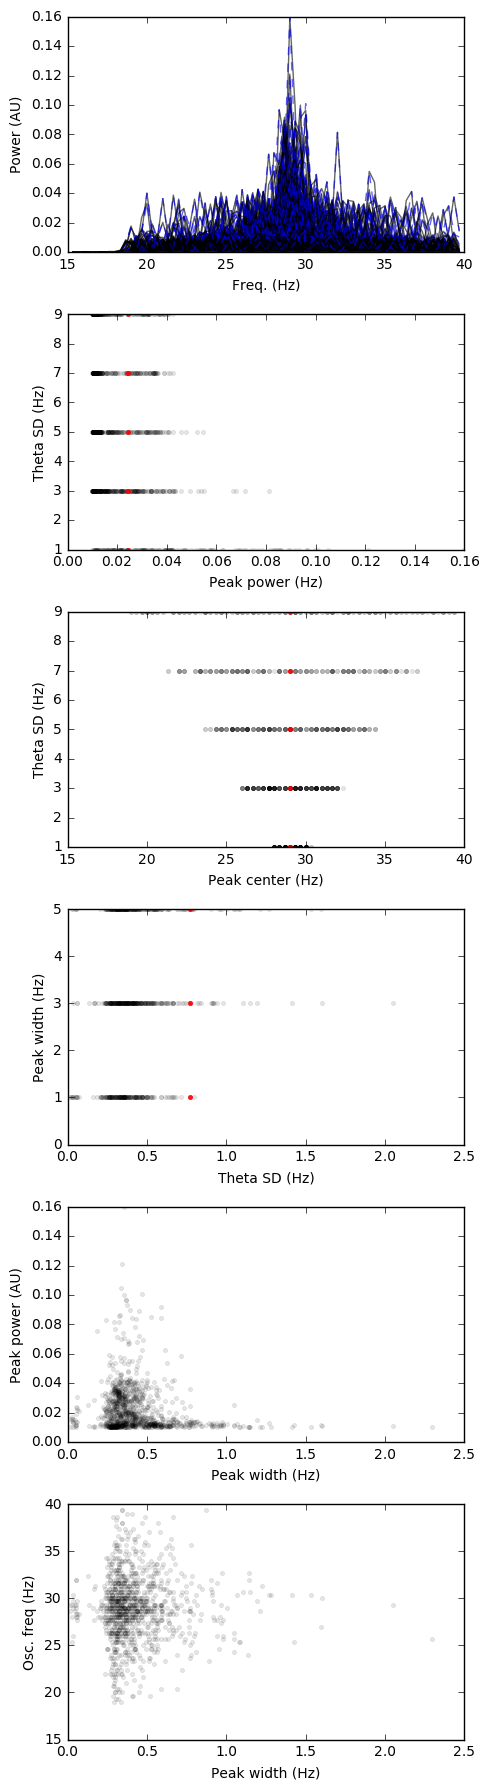

In [94]:
import sys
path = "/home/ejp/src/bw/data/kur_r/"
n_sim = ['1', '3', '5', '7', '9']

# ----------------------------------------------------------------------
ns = []
psds = []
powers = []
widths = []
centers = []
fits = []
for n in n_sim:
    files = glob.glob(path + 'r{}_run*.hdf5'.format(n))
    for fi in files:
        
        res = None
        res = load_kdf(fi)
        
        lfp = res['lfp']
        dt = res['dt']
        fs, psd = welch(lfp, int(1 / dt), scaling='density', nperseg=3000)
        
        m = np.logical_and(fs < 40, fs > 15)
        fs = fs[m]
        psd = psd[m]
    
        try:
            center, power, width, fit = fit_gaussian(fs, psd, 20, mph=1e-2)
        except:
            print("Lin alg error on {}".format(sys.exc_info()[0]))
            continue
        
        psds.append(psd)
        fits.append(fit)
        
        powers.append(power)
        widths.append(width)
        centers.append(center)
        ns.append([float(n)] * center.size)
        
ns = np.concatenate(ns)
centers = np.concatenate(centers)
powers = np.concatenate(powers)
widths = np.concatenate(widths)

# ----------------------------------------------------------------------
plt.figure(figsize=(5, 18))
n_plot = 6
n = 1
plt.subplot(n_plot, 1, n)
for p, psd, fit in zip(ns, psds, fits):
    plt.plot(fs, psd, color='k', alpha=.6)
    plt.plot(fs, fit, linestyle='--', color='blue', alpha=.6)
    plt.legend(loc='bottom', ncol=10)
    plt.xlabel("Freq. (Hz)")
    plt.ylabel("Power (AU)")
    plt.tight_layout()
#     plt.ylim(1e-4, 1)

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(powers, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(powers[m]), n0, '.r', alpha=0.9, lw=10)
plt.ylabel("Theta SD (Hz)")
plt.xlabel("Peak power (Hz)")
# plt.ylim(0, 5)
plt.tight_layout()


n += 1
plt.subplot(n_plot, 1, n)
plt.plot(centers, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(centers[m]), n0, '.r', alpha=0.9, lw=10)
plt.ylabel("Theta SD (Hz)")
plt.xlabel("Peak center (Hz)")
# plt.ylim(0, 5)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, ns, '.k', alpha=0.1)
for n0 in n_sim:
    m = n0 == ns
    plt.plot(np.nanmedian(widths[m]), n0, '.r', alpha=0.9, lw=10)
plt.xlabel("Theta SD (Hz)")
plt.ylabel("Peak width (Hz)")
plt.ylim(0, 5)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, powers, '.k', alpha=0.1)
plt.xlabel("Peak width (Hz)")
plt.ylabel("Peak power (AU)")
# plt.ylim(0, 1)
# plt.xlim(0, 1)
plt.tight_layout()

n += 1
plt.subplot(n_plot, 1, n)
plt.plot(widths, centers, '.k', alpha=0.1)
plt.ylabel("Osc. freq (Hz)")
plt.xlabel("Peak width (Hz)")
plt.tight_layout()
# plt.ylim(20, 40)
# plt.xlim(0, 2)

plt.savefig("../figs/kur_r.pdf")

# -
print(len(fits), " peaks found.")
print("corr(R, centers)", spearmanr(ns, centers))
print("corr(R, widths)", spearmanr(ns, widths))
print("corr(widths, powers)", spearmanr(widths, powers))
print("corr(widths, centers)", spearmanr(widths, centers))

# Discussion

We can't be certain of identification.

Combinations are possible, and make analysis much harder. 

We need to develop ways to test/infer. Touch on RG's work?

